# Analyse des départ HP v2

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
os.chdir("")

## Indication du fichier que l'on va utiliser

In [2]:
file_origine='BA_B_Result.xlsx'

Line A = Echantillonnage de 3,


## Lecture du fichier et intégration dans des Dataframes

In [3]:
#Lecture du fichier origine
xl=pd.ExcelFile(file_origine)
#Mise dans un dataframe
df_origine=xl.parse("Data")
#Affichage des 10 premières lignes du dataframe
df_origine.head(10)

,FR1_FECHA,NUM,FR1_FECHA.1,FR1_LINEA,FR1_TIPO,FR1_REGIST,FR1_ORDEN,FR1_TREN,FR1_CAUC1,FR1_CAUC2,...,Dep_Theo_C1_HP_AM,Dep_Reel_C1_HP_AM,Dep_Theo_C2_HP_PM,Dep_Reel_C2_HP_PM,Dep_Theo_C1_HV,Dep_Theo_C2_HV,Dep_Reel_C1_HV,Dep_Reel_C2_HV,Nb_incident_Interrup_C1,Nb_incident_Interrup_C2
0,2015-01-01,0,2015-01-01,B,F,1,1,3,V,V,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-01,1,2015-01-01,B,F,2,2,4,V,V,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-01,2,2015-01-01,B,F,3,3,5,V,V,...,0,0,0,0,0,1,0,0,0,0
3,2015-01-01,3,2015-01-01,B,F,4,4,6,V,V,...,0,0,0,0,0,1,0,0,0,0
4,2015-01-01,4,2015-01-01,B,F,5,5,7,V,V,...,0,0,0,0,0,1,0,0,0,0
5,2015-01-01,5,2015-01-01,B,F,6,6,1,V,V,...,0,0,0,0,1,1,0,0,0,0
6,2015-01-01,6,2015-01-01,B,F,7,7,2,V,V,...,0,0,0,0,1,1,0,0,0,0
7,2015-01-01,7,2015-01-01,B,F,8,8,3,V,V,...,0,0,0,0,1,1,0,0,0,0
8,2015-01-01,8,2015-01-01,B,F,9,9,4,V,V,...,0,0,0,0,1,1,0,0,0,0
9,2015-01-01,9,2015-01-01,B,F,10,10,5,V,V,...,0,0,0,0,1,1,0,0,0,0


## Affichage pour rappel du type de données

In [4]:
df_origine.dtypes

FR1_FECHA                  datetime64[ns]
NUM                                 int64
FR1_FECHA.1                datetime64[ns]
FR1_LINEA                          object
FR1_TIPO                           object
FR1_REGIST                          int64
FR1_ORDEN                           int64
FR1_TREN                            int64
FR1_CAUC1                          object
FR1_CAUC2                          object
FR1_COCC1                           int64
FR1_COCC2                           int64
FR1_KM                             object
FR1_KMV                            object
FR1_VIAC1                          object
FR1_VIAC2                          object
FR1_SALC1                          object
FR1_SALC2                          object
FR1_SCAUC2                         object
FR1_SCAUC1                         object
TIPO_DIA                           object
SAISON                             object
PERIODO                             int64
LINEA                             

## Indexation selon les dates et les types de jour

In [5]:
#On indexe le tableau origine selon la colonne qui contient des dates
df_new_index = df_origine.set_index(['FR1_FECHA', 'TIPO_DIA'], inplace=False)

df_new_index.head(10)

NUM FR1_FECHA.1 FR1_LINEA FR1_TIPO  FR1_REGIST  \
FR1_FECHA  TIPO_DIA                                                   
2015-01-01 DOMINGO     0  2015-01-01         A        F           1   
           DOMINGO     1  2015-01-01         A        F           2   
           DOMINGO     2  2015-01-01         A        F           3   
           DOMINGO     3  2015-01-01         A        F           4   
           DOMINGO     4  2015-01-01         A        F           5   
           DOMINGO     5  2015-01-01         A        F           6   
           DOMINGO     6  2015-01-01         A        F           7   
           DOMINGO     7  2015-01-01         A        F           8   
           DOMINGO     8  2015-01-01         A        F           9   
           DOMINGO     9  2015-01-01         A        F          10   

                     FR1_ORDEN  FR1_TREN FR1_CAUC1 FR1_CAUC2  FR1_COCC1  \
FR1_FECHA  TIPO_DIA                                                       
2015-01-01 DOMINGO           1         4                              5   
           DOMINGO           2         5                              5   
           DOMINGO           3         6                              5   
           DOMINGO           4         1                              5   
           DOMINGO           5         2                              5   
           DOMINGO           6         3                              5   
           DOMINGO           7         4                              5   
           DOMINGO           8         5                              5   
           DOMINGO           9         6                              5   
           DOMINGO          10         1                              5   

                              ...            Dep_Theo_C1_HP_AM  \
FR1_FECHA  TIPO_DIA           ...                                
2015-01-01 DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   

                    Dep_Reel_C1_HP_AM Dep_Theo_C2_HP_PM Dep_Reel_C2_HP_PM  \
FR1_FECHA  TIPO_DIA                                                         
2015-01-01 DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   

                    Dep_Theo_C1_HV Dep_Theo_C2_HV Dep_Reel_C1_HV  \
FR1_FECHA  TIPO_DIA                                                
2015-01-01 DOMINGO               0              0              0   
           DOMINGO               0              1              0   
           DOMINGO               0              1              0   
           DOMINGO               1              1              1   
           DOMINGO               1              1              1   
           DOMINGO               1              1              1   
     

In [6]:
df_habil = df_new_index.xs(('HABIL'), level=1)
df_sabado = df_new_index.xs(('SABADO'), level=1)
df_domingo = df_new_index.xs(('DOMINGO'), level=1)

df_habil.head(10)

,NUM,FR1_FECHA.1,FR1_LINEA,FR1_TIPO,FR1_REGIST,FR1_ORDEN,FR1_TREN,FR1_CAUC1,FR1_CAUC2,FR1_COCC1,...,Dep_Theo_C1_HP_AM,Dep_Reel_C1_HP_AM,Dep_Theo_C2_HP_PM,Dep_Reel_C2_HP_PM,Dep_Theo_C1_HV,Dep_Theo_C2_HV,Dep_Reel_C1_HV,Dep_Reel_C2_HV,Nb_incident_Interrup_C1,Nb_incident_Interrup_C2
FR1_FECHA,,,,,,,,,,,,,,,,,,,,,
2015-01-05,460,2015-01-05,A,H,1,1,2,,,5,...,0,0,0,0,0,0,0,0,0,0
2015-01-05,461,2015-01-05,A,H,2,2,3,,,5,...,0,0,0,0,0,0,0,0,0,0
2015-01-05,462,2015-01-05,A,H,3,3,4,,,5,...,0,0,0,0,0,0,0,1,0,0
2015-01-05,463,2015-01-05,A,H,4,4,5,,,5,...,0,0,0,0,0,1,0,1,0,0
2015-01-05,464,2015-01-05,A,H,5,5,6,,,5,...,0,0,0,0,0,1,0,1,0,0
2015-01-05,465,2015-01-05,A,H,6,6,7,,,5,...,0,0,0,0,0,1,1,1,0,0
2015-01-05,466,2015-01-05,A,H,7,7,1,,,5,...,0,0,0,0,1,1,1,1,0,0
2015-01-05,467,2015-01-05,A,H,8,8,2,,,5,...,0,0,0,0,1,1,1,1,0,0
2015-01-05,468,2015-01-05,A,H,9,9,3,,,5,...,0,0,0,0,1,1,1,1,0,0


## Calcul de l'indice du KPI Départ HP par jour

In [7]:
#Création du DataFrame de résultat
df_temp=pd.DataFrame()

#Terminus
Cabecera_1 = {'A' : 'SAN PEDRITO', 'B' : 'JUAN MANUEL DE ROSAS', 'C' : 'CONSTITUCION', 'D' : 'CONGRESO DE TUCUMAN', 'E' : 'PLAZA DE LOS VIRREYES', 'H' : 'LAS HERAS', 'P' : 'INTENDENTE SAGUIER'}
Cabecera_2 = {'A' : 'PLAZA DE MAYO', 'B' : 'LEANDRO N.ALEM', 'C' : 'RETIRO', 'D' : 'CATEDRAL', 'E' : 'BOLIVAR', 'H' : 'HOSPITALES', 'P' : 'GRAL SAVIO'}

Sens_AM = {'A' : 'C1', 'B' : 'C1', 'C' : 'C1', 'D' : 'C1', 'E' : 'C1', 'H' : 'C2', 'P' : 'C1'}
Sens_PM = {'A' : 'C2', 'B' : 'C2', 'C' : 'C2', 'D' : 'C2', 'E' : 'C2', 'H' : 'C1', 'P' : 'C2'}

if df_habil.iloc[1,3] == 'H':
    #Nombre de depart Theo HP AM
    df_habil.loc[:,'Dep_Theo_C2_HP_AM'] = np.where(np.logical_and(df_habil.loc[:,'INT_C2']!=datetime.timedelta(seconds=1),df_habil.loc[:,'Desp_HP_C2_AM']==1),1,0)
    df_temp.loc[:,'Count_Depart_Theo_HP_AM'] = df_habil.loc[:,'Dep_Theo_C2_HP_AM'].resample('D').sum()
    
    #Nombre de depart réel HP AM
    df_habil.loc[:,'Dep_Reel_C2_HP_AM'] = np.where(np.logical_and(pd.notnull(df_habil.loc[:,'I_REELC2']),df_habil.loc[:,'Desp_HP_C2_AM']==1),1,0)
    df_temp.loc[:,'Count_Depart_reel_HP_AM'] = df_habil.loc[:,'Dep_Reel_C2_HP_AM'].resample('D').sum()
    
    #Calcul del'indice du KPI départ HP AM
    #df_temp['Indice_Depart_HP_AM'] = df_temp['Count_Depart_reel_HP_AM'] / df_temp['Count_Depart_Theo_HP_AM']

    #Calcul du KPI depart HP AM
    #UP_Depart_HP = 10 * (df_temp['Count_Depart_Theo_HP_AM'] - df_temp['Count_Depart_reel_HP_AM']) * coche_result
    #df_temp['UP_Depart_HP_AM'] = np.where(df_temp['Indice_Depart_HP_AM']<0.97,UP_Depart_HP,0)

    #df_result['UP_Depart_HP_AM'] = df_temp['UP_Depart_HP_AM'].resample('M').sum()
    
    #Nombre de depart Theo HP PM
    df_habil.loc[:,'Dep_Theo_C1_HP_PM'] = np.where(np.logical_and(df_habil.loc[:,'INT_C1']!=datetime.timedelta(seconds=1),df_habil.loc[:,'Desp_HP_C1_PM']==1),1,0)
    df_temp.loc[:,'Count_Depart_Theo_HP_PM'] = df_habil.loc[:,'Dep_Theo_C1_HP_PM'].resample('D').sum()
    
    #Nombre de depart réel HP PM
    df_habil.loc[:,'Dep_Reel_C1_HP_PM'] = np.where(np.logical_and(pd.notnull(df_habil.loc[:,'I_REELC1']),df_habil.loc[:,'Desp_HP_C1_PM']==1),1,0)
    df_temp.loc[:,'Count_Depart_reel_HP_PM'] = df_habil.loc[:,'Dep_Reel_C1_HP_PM'].resample('D').sum()
    
    #Calcul del'indice du KPI départ HP PM
    #df_temp['Indice_Depart_HP_PM'] = df_temp['Count_Depart_reel_HP_PM'] / df_temp['Count_Depart_Theo_HP_PM']

    #Calcul du KPI depart HP PM
    #UP_Depart_HP = 10 * (df_temp['Count_Depart_Theo_HP_PM'] - df_temp['Count_Depart_reel_HP_PM']) * coche_result
    #df_temp['UP_Depart_HP_PM'] = np.where(df_temp['Indice_Depart_HP_PM']<0.97,UP_Depart_HP,0)

    #df_result['UP_Depart_HP_PM'] = df_temp['UP_Depart_HP_PM'].resample('M').sum()
    
else:
    #Nombre de depart Theo HP AM
    df_habil.loc[:,'Dep_Theo_C1_HP_AM'] = np.where(np.logical_and(df_habil.loc[:,'INT_C1']!=datetime.timedelta(seconds=1),df_habil.loc[:,'Desp_HP_C1_AM']==1),1,0)
    df_temp.loc[:,'Count_Depart_Theo_HP_AM'] = df_habil.loc[:,'Dep_Theo_C1_HP_AM'].resample('D').sum()
    
    #Nombre de depart réel HP AM
    df_habil.loc[:,'Dep_Reel_C1_HP_AM'] = np.where(np.logical_and(pd.notnull(df_habil.loc[:,'I_REELC1']),df_habil.loc[:,'Desp_HP_C1_AM']==1),1,0)
    df_temp.loc[:,'Count_Depart_reel_HP_AM'] = df_habil.loc[:,'Dep_Reel_C1_HP_AM'].resample('D').sum()
    
    #Calcul del'indice du KPI départ HP AM
    #df_temp['Indice_Depart_HP_AM'] = df_temp['Count_Depart_reel_HP_AM'] / df_temp['Count_Depart_Theo_HP_AM']

    #Calcul du KPI depart HP AM
    #UP_Depart_HP = 10 * (df_temp['Count_Depart_Theo_HP_AM'] - df_temp['Count_Depart_reel_HP_AM']) * coche_result
    #df_temp['UP_Depart_HP_AM'] = np.where(df_temp['Indice_Depart_HP_AM']<0.97,UP_Depart_HP,0)

    #df_result['UP_Depart_HP_AM'] = df_temp['UP_Depart_HP_AM'].resample('M').sum()
    
    #Nombre de depart Theo HP PM
    df_habil.loc[:,'Dep_Theo_C2_HP_PM'] = np.where(np.logical_and(df_habil.loc[:,'INT_C2']!=datetime.timedelta(seconds=1),df_habil.loc[:,'Desp_HP_C2_PM']==1),1,0)
    df_temp.loc[:,'Count_Depart_Theo_HP_PM'] = df_habil.loc[:,'Dep_Theo_C2_HP_PM'].resample('D').sum()
    
    #Nombre de depart réel HP PM
    df_habil.loc[:,'Dep_Reel_C2_HP_PM'] = np.where(np.logical_and(pd.notnull(df_habil.loc[:,'I_REELC2']),df_habil.loc[:,'Desp_HP_C2_PM']==1),1,0)
    df_temp.loc[:,'Count_Depart_reel_HP_PM'] = df_habil.loc[:,'Dep_Reel_C2_HP_PM'].resample('D').sum()
    
    #Calcul del'indice du KPI départ HP PM
    #df_temp['Indice_Depart_HP_PM'] = df_temp['Count_Depart_reel_HP_PM'] / df_temp['Count_Depart_Theo_HP_PM']

    #Calcul du KPI depart HP PM
    #UP_Depart_HP = 10 * (df_temp['Count_Depart_Theo_HP_PM'] - df_temp['Count_Depart_reel_HP_PM']) * coche_result
    #df_temp['UP_Depart_HP_PM'] = np.where(df_temp['Indice_Depart_HP_PM']<0.97,UP_Depart_HP,0)

    #df_result['UP_Depart_HP_PM'] = df_temp['UP_Depart_HP_PM'].resample('M').sum()
    
#df_result['UP_Depart_HP'] = df_result['UP_Depart_HP_AM'] + df_result['UP_Depart_HP_PM']

#df_result.head(10)

df_temp.loc[:,:].head(10)

C:\Users\SA237250\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\SA237250\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Count_Depart_Theo_HP_AM,Count_Depart_reel_HP_AM,Count_Depart_Theo_HP_PM,Count_Depart_reel_HP_PM
FR1_FECHA,,,,
2015-01-05,30,30,29,28
2015-01-06,30,29,29,25
2015-01-07,30,29,29,22
2015-01-08,30,30,29,27
2015-01-09,30,29,29,26
2015-01-10,0,0,0,0
2015-01-11,0,0,0,0
2015-01-12,30,30,29,21
2015-01-13,30,29,29,28


In [8]:
#Somme du nombre d'intervalles excédentaires
print(df_temp['Count_Depart_reel_HP_AM'].sum(), df_temp['Count_Depart_reel_HP_PM'].sum())


24168 23212


## Mettre sur la même base le nombre d'intervale théorique (100)

In [9]:
#Pour le matin
df_temp['Count_Depart_reel_HP_AM'] = df_temp['Count_Depart_reel_HP_AM'] * 100 / df_temp['Count_Depart_Theo_HP_AM']

df_temp['Count_Depart_Theo_HP_AM'] = 100

#Pour le soir
df_temp['Count_Depart_reel_HP_PM'] = df_temp['Count_Depart_reel_HP_PM'] * 100 / df_temp['Count_Depart_Theo_HP_PM']

df_temp['Count_Depart_Theo_HP_PM'] = 100

df_temp.head(10)

,Count_Depart_Theo_HP_AM,Count_Depart_reel_HP_AM,Count_Depart_Theo_HP_PM,Count_Depart_reel_HP_PM
FR1_FECHA,,,,
2015-01-05,100,100.000000,100,96.551724
2015-01-06,100,96.666667,100,86.206897
2015-01-07,100,96.666667,100,75.862069
2015-01-08,100,100.000000,100,93.103448
2015-01-09,100,96.666667,100,89.655172
2015-01-10,100,NaN,100,NaN
2015-01-11,100,NaN,100,NaN
2015-01-12,100,100.000000,100,72.413793
2015-01-13,100,96.666667,100,96.551724


## Affichage des informations du nb d'interval

In [10]:
df_final = df_temp

df_final.dropna(subset=['Count_Depart_reel_HP_AM'], inplace=True)

df_final['Dep_reel_HP_AM_NOK'] = 100 - df_final['Count_Depart_reel_HP_AM']

df_final['Dep_reel_HP_PM_NOK'] = 100 - df_final['Count_Depart_reel_HP_PM']

#Descriptif des interruptions C1
df_final.head(10)

,Count_Depart_Theo_HP_AM,Count_Depart_reel_HP_AM,Count_Depart_Theo_HP_PM,Count_Depart_reel_HP_PM,Dep_reel_HP_AM_NOK,Dep_reel_HP_PM_NOK
FR1_FECHA,,,,,,
2015-01-05,100,100.000000,100,96.551724,0.000000,3.448276
2015-01-06,100,96.666667,100,86.206897,3.333333,13.793103
2015-01-07,100,96.666667,100,75.862069,3.333333,24.137931
2015-01-08,100,100.000000,100,93.103448,0.000000,6.896552
2015-01-09,100,96.666667,100,89.655172,3.333333,10.344828
2015-01-12,100,100.000000,100,72.413793,0.000000,27.586207
2015-01-13,100,96.666667,100,96.551724,3.333333,3.448276
2015-01-14,100,100.000000,100,100.000000,0.000000,0.000000
2015-01-15,100,96.666667,100,96.551724,3.333333,3.448276


In [15]:
print(df_final['Dep_reel_HP_AM_NOK'].sum())

2346.213132717676


## Descriptions et informations des données

In [11]:
df_final.describe()

,Count_Depart_Theo_HP_AM,Count_Depart_reel_HP_AM,Count_Depart_Theo_HP_PM,Count_Depart_reel_HP_PM,Dep_reel_HP_AM_NOK,Dep_reel_HP_PM_NOK
count,760.0,760.000000,760.0,760.000000,760.000000,760.000000
mean,100.0,96.912877,100.0,94.260390,3.087123,5.739610
std,0.0,11.504043,0.0,11.655686,11.504043,11.655686
min,100.0,0.000000,100.0,0.000000,0.000000,0.000000
25%,100.0,96.875000,100.0,93.103448,0.000000,0.000000
50%,100.0,100.000000,100.0,97.435897,0.000000,2.564103
75%,100.0,100.000000,100.0,100.000000,3.125000,6.896552
max,100.0,100.000000,100.0,100.000000,100.000000,100.000000


## Création d'un jeu de donnée "Train" et d'un jeu de donnée "Test"

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final

X_train, X_test = train_test_split(X, test_size=0.20)

print(len(X_train), len(X_test))

## Model data by finding best fit distribution to data

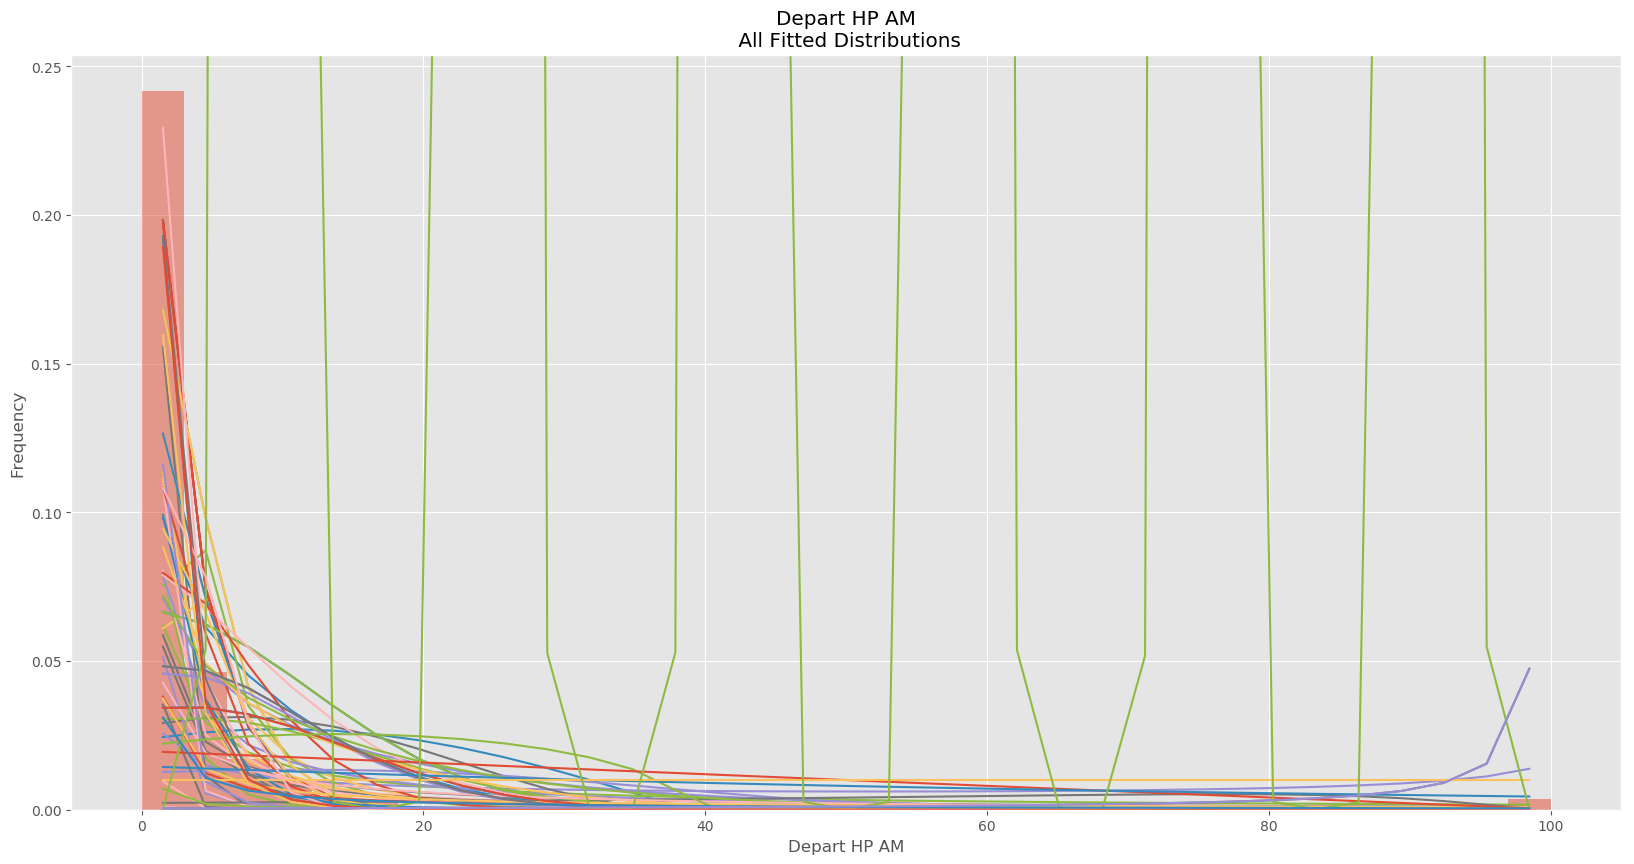

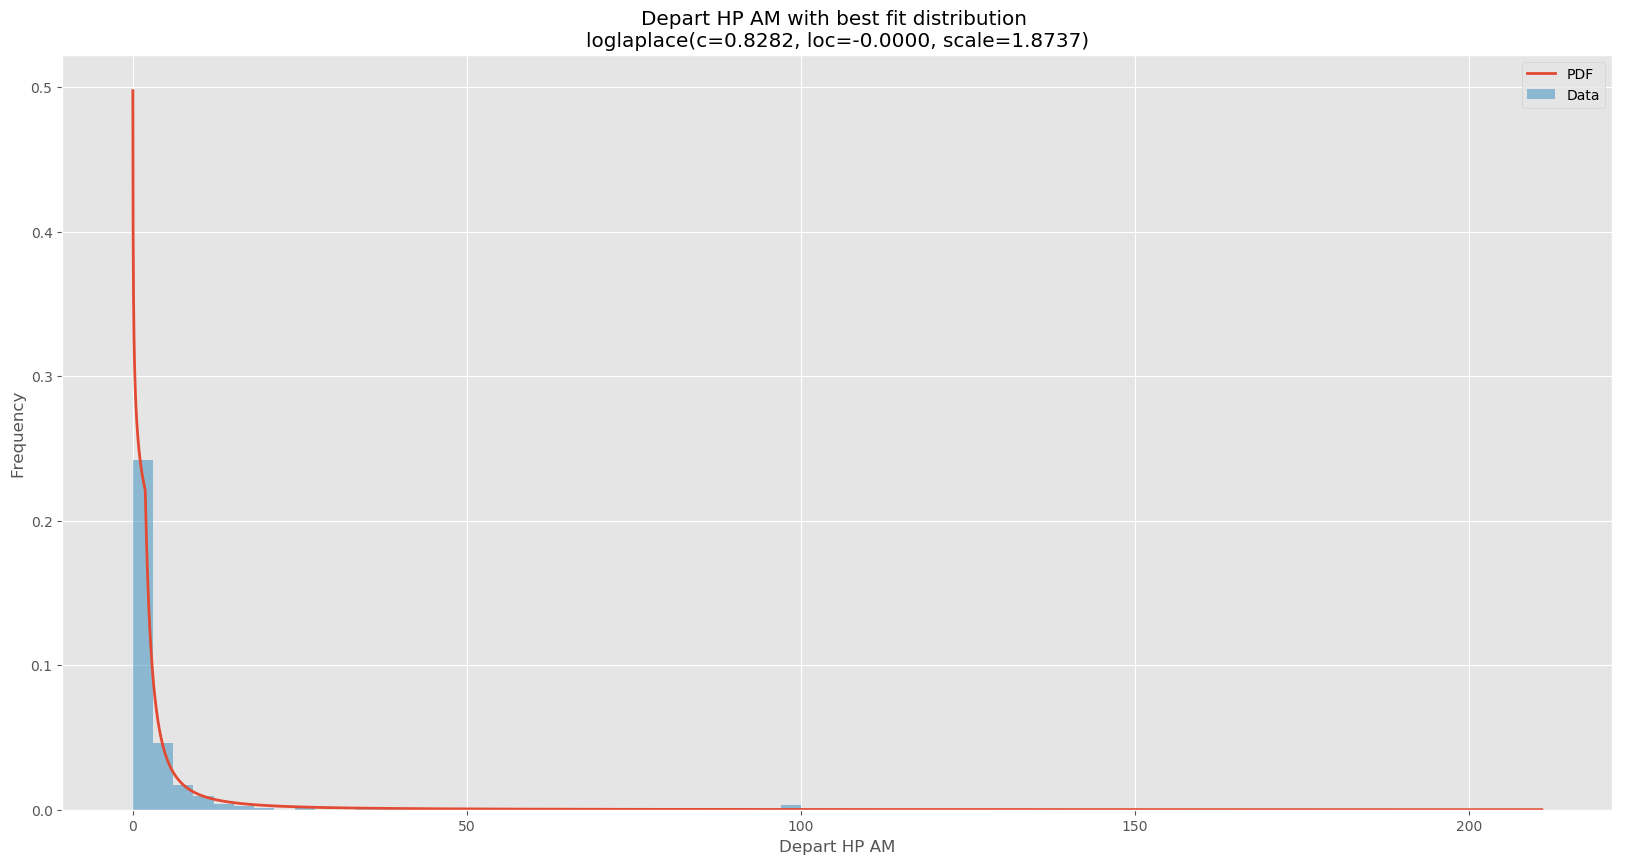

In [210]:
#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    sses = []
    
    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                sses.append([sse, distribution.name, params])
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    #Export en CSV
    df = pd.DataFrame(sses)
    filename = 'BA_' + df_origine.iloc[1,3] + '_Depart HP AM_Distribution.csv'
    df.to_csv(filename, index=False, encoding='utf-8', sep=';', decimal=',')
    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Propbability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
#data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
#data_temp = df_final['Indice_Interval']
data = X_train['Dep_reel_HP_AM_NOK']
nb_pas = np.absolute(np.int(data.max() / 3))

# Plot for comparison
plt.figure(figsize=(20,10), dpi=100)
#plt.xticks(np.linspace(0, 24, 9))
#plt.yticks(np.linspace(0, 0.14, 8))
ax = data.plot(kind='hist', bins=nb_pas, density=True, alpha=0.5, color=plt.rcParams['axes.prop_cycle'].by_key()['color'])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution(data, nb_pas, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Depart HP AM\n All Fitted Distributions')
ax.set_xlabel(u'Depart HP AM')
ax.set_ylabel('Frequency')

#Enregistrement du graphique
plt.savefig('BA_' + df_origine.iloc[1,3] + '_Depart HP AM_All.png', dpi=200)

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(20,10), dpi=100)
#plt.xticks(np.linspace(0, 24, 9))
#plt.yticks(np.linspace(0, 0.14, 9))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=nb_pas, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.4f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

#ax.set_ylim(dataYLim)
ax.set_title(u'Depart HP AM with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Depart HP AM')
ax.set_ylabel('Frequency')

#Enregistrement du graphique
plt.savefig('BA_' + df_origine.iloc[1,3] + '_Depart HP AM_Best.png', dpi=200)

## Evaluation distribution fit

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

y_true = X_test['Dep_reel_HP_AM_NOK']
y_pred = st.exponweib.rvs(3936.7419346326933, 2.214265555018602, -131.56460973165446, 57.53583254920839, size=len(y_true))
y_pred = np.where(y_pred<3,0,y_pred)

#Best possible score is 1.0, lower values are worse.
print('EVS %f' % explained_variance_score(y_true, y_pred))

#MAE output is non-negative floating point. The best value is 0.0.
print('MAE %f' % mean_absolute_error(y_true, y_pred))

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
print('*MSE %f' % mean_squared_error(y_true, y_pred))

print('*RMSE %f' % np.sqrt(mean_squared_error(y_true, y_pred)))

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
print('MSLE %f' % mean_squared_log_error(y_true, y_pred))

#A positive floating point value (the best value is 0.0).
print('*MedAE %f' % median_absolute_error(y_true, y_pred))

#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
#A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0
print('R2score %f' % r2_score(y_true, y_pred))

In [ ]:
print('Sum real data = %f' % y_true.sum())
print('Sum forecast data = %f' % y_pred.sum())

In [ ]:
hist = y_true.hist(bins=np.int(y_true.max()/1), density=True)
ax = hist.hist(np.array(y_pred), bins=np.int(y_pred.max()/1), density=True, alpha=0.7)

## Evaluation distribution fit

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

y_true = X_test['Dep_reel_HP_AM_NOK']
y_pred = st.exponweib.rvs(3936.7419346326933, 2.214265555018602, -131.56460973165446, 57.53583254920839, size=len(y_true))
y_pred = np.where(y_pred<3,0,y_pred)

#Best possible score is 1.0, lower values are worse.
print('EVS %f' % explained_variance_score(y_true, y_pred))

#MAE output is non-negative floating point. The best value is 0.0.
print('MAE %f' % mean_absolute_error(y_true, y_pred))

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
print('*MSE %f' % mean_squared_error(y_true, y_pred))

print('*RMSE %f' % np.sqrt(mean_squared_error(y_true, y_pred)))

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
print('MSLE %f' % mean_squared_log_error(y_true, y_pred))

#A positive floating point value (the best value is 0.0).
print('*MedAE %f' % median_absolute_error(y_true, y_pred))

#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
#A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0
print('R2score %f' % r2_score(y_true, y_pred))

In [ ]:
print('Sum real data = %f' % y_true.sum())
print('Sum forecast data = %f' % y_pred.sum())

In [ ]:
hist = y_true.hist(bins=np.int(y_true.max()/1), density=True)
ax = hist.hist(np.array(y_pred), bins=np.int(y_pred.max()/1), density=True, alpha=0.7)